In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
y=pd.read_csv('drive/My Drive/Random/Output.csv')

In [ ]:
corpus=[]
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
corpus = joblib.load('drive/My Drive/Random/cleaned (1).pkl') 

In [ ]:
len(corpus)

14499

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
voc_size=5000
one_hot_rep=[ one_hot(word ,voc_size) for word in corpus ]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [ ]:
sent_len=5000
embedded_docs=pad_sequences(sequences=one_hot_rep,maxlen=sent_len,padding='pre')

In [ ]:
embedding_vector_feature=64
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length=sent_len))
model.add(Dropout(.2))
model.add(LSTM(embedding_vector_feature))
model.add(Dense(embedding_vector_feature,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 64)          320000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 357,249
Trainable params: 357,249
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y['by'] = le.fit_transform(y['by'])

In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y['by'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,random_state=40,test_size=.2)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop= EarlyStopping(monitor='val_loss',mode='min',patience=25,verbose=1)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=64,epochs=60,callbacks=[early_stop])

Epoch 1/60
182/182 [==============================] - 1082s 6s/step - loss: 157.4931 - val_loss: 212.6548
Epoch 2/60
182/182 [==============================] - 1089s 6s/step - loss: 143.0491 - val_loss: 223.5864
Epoch 3/60
182/182 [==============================] - 1097s 6s/step - loss: 135.4497 - val_loss: 225.9974
Epoch 4/60
 58/182 [========>.....................] - ETA: 11:48 - loss: 123.1254

KeyboardInterrupt: ignored

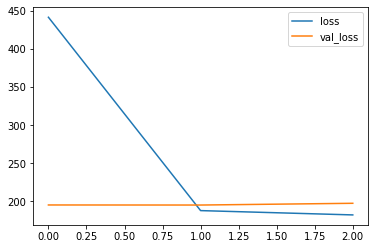

In [ ]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
mean_absolute_error(y_test,predictions)

11.539812077489392

In [ ]:
explained_variance_score(y_test,predictions)

-0.011310408943826733

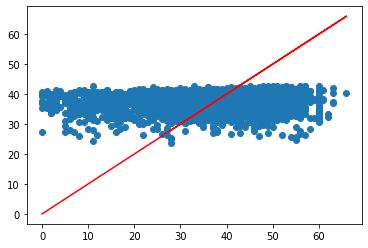

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')